<a href="https://colab.research.google.com/github/nourshadid/DeepLearningCNN/blob/main/DeepLearningFinal_77__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.regularizers import l2, l1, L1L2
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
data = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = data

In [ ]:
print(x_train.shape, y_train.shape,'\n', x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) 
 (10000, 32, 32, 3) (10000, 1)


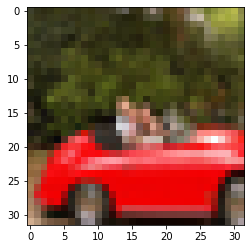

In [ ]:
plt.imshow(x_train[99], plt.cm.gray)
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same',  kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(l2=0.001)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same',  kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=540, activation='LeakyReLU'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax')) #num of classes = 10
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Convert target labels to one-hot encoded matrix
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
batch_size = 142
epochs = 35
model.compile(loss='categorical_crossentropy',
              metrics=['categorical_accuracy'],
              optimizer=Adam(learning_rate=0.001))

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.15,
                    shuffle=True,
                    callbacks=[model_checkpoint_callback])

Epoch 1/35
300/300 [==============================] - 14s 19ms/step - loss: 4.4909 - categorical_accuracy: 0.1008 - val_loss: 2.3682 - val_categorical_accuracy: 0.0953
Epoch 2/35
300/300 [==============================] - 5s 15ms/step - loss: 2.2367 - categorical_accuracy: 0.1777 - val_loss: 2.1884 - val_categorical_accuracy: 0.2148
Epoch 3/35
300/300 [==============================] - 5s 16ms/step - loss: 1.9323 - categorical_accuracy: 0.3052 - val_loss: 1.7711 - val_categorical_accuracy: 0.3939
Epoch 4/35
300/300 [==============================] - 5s 15ms/step - loss: 1.6908 - categorical_accuracy: 0.4014 - val_loss: 1.8052 - val_categorical_accuracy: 0.3887
Epoch 5/35
300/300 [==============================] - 5s 15ms/step - loss: 1.5730 - categorical_accuracy: 0.4480 - val_loss: 1.5868 - val_categorical_accuracy: 0.4712
Epoch 6/35
300/300 [==============================] - 5s 16ms/step - loss: 1.4650 - categorical_accuracy: 0.4896 - val_loss: 1.3893 - val_categorical_accuracy: 0.54

In [ ]:
train_accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']
print("validation accuracy:", val_accuracy)
print("training accuracy:", train_accuracy)

validation accuracy: [0.09533333033323288, 0.21480000019073486, 0.3938666582107544, 0.38866665959358215, 0.47119998931884766, 0.5400000214576721, 0.5602666735649109, 0.5708000063896179, 0.6115999817848206, 0.6140000224113464, 0.6422666907310486, 0.6452000141143799, 0.6369333267211914, 0.6883999705314636, 0.697866678237915, 0.6832000017166138, 0.711733341217041, 0.7141333222389221, 0.6926666498184204, 0.7061333060264587, 0.725600004196167, 0.7376000285148621, 0.7465333342552185, 0.7381333112716675, 0.727066695690155, 0.7509333491325378, 0.7549333572387695, 0.7378666400909424, 0.7561333179473877, 0.7603999972343445, 0.7593333125114441, 0.7594666481018066, 0.7530666589736938, 0.7639999985694885, 0.7733333110809326]
training accuracy: [0.10077647119760513, 0.1777176409959793, 0.30524706840515137, 0.4014352858066559, 0.4480000138282776, 0.48955294489860535, 0.5267529487609863, 0.5571293830871582, 0.5808470845222473, 0.6022117733955383, 0.6172000169754028, 0.6380705833435059, 0.6517882347106

In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)
print("test loss:", results[0])
print("test categorical accuracy:", results[1])

test loss: 0.7308536767959595
test categorical accuracy: 0.7749999761581421


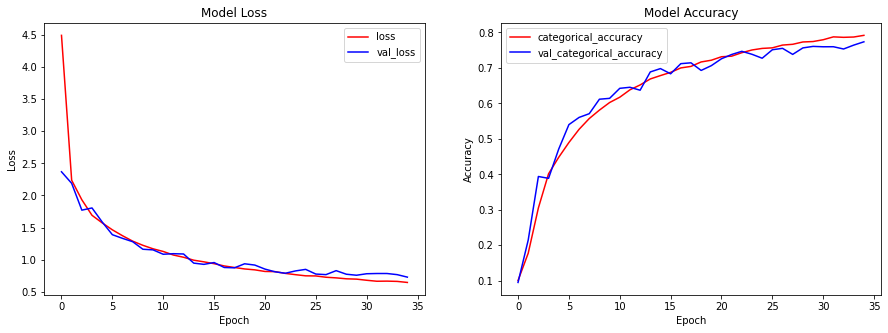

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

epochs_list = list(range(history.params['epochs']))

ax[0].plot(epochs_list, history.history['loss'], color='red', label='loss')
ax[0].plot(epochs_list, history.history['val_loss'], color='blue', label='val_loss')
ax[0].set_title('Model Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs_list, history.history['categorical_accuracy'], color='red', label='categorical_accuracy')
ax[1].plot(epochs_list, history.history['val_categorical_accuracy'], color='blue', label='val_categorical_accuracy')
ax[1].set_title('Model Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

plt.show()

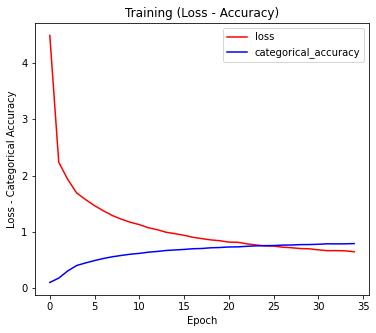

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

epochs_list = list(range(history.params['epochs']))

ax.plot(epochs_list, history.history['loss'], color='red', label='loss')
ax.plot(epochs_list, history.history['categorical_accuracy'], color='blue', label='categorical_accuracy')
ax.set_title('Training (Loss - Accuracy)')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss - Categorical Accuracy')


plt.show()

In [ ]:
pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=-1)
y_true = np.argmax(y_test, axis=-1)

confusion_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)

313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[739  15  67  16  27   8   6   8  79  35]
 [ 11 872   4   6   3   6   5   2  14  77]
 [ 37   3 712  33 110  37  40  16   7   5]
 [ 13   5  73 591  93 129  50  27   9  10]
 [ 10   2  48  35 835  12  19  30   7   2]
 [  6   1  57 149  71 638  24  45   4   5]
 [  3   3  50  48  49   7 830   3   6   1]
 [ 13   2  44  31  79  30   2 791   4   4]
 [ 32  16  21  16   8   7   8   5 866  21]
 [ 16  45   7   8   5   1   3  20  19 876]]
